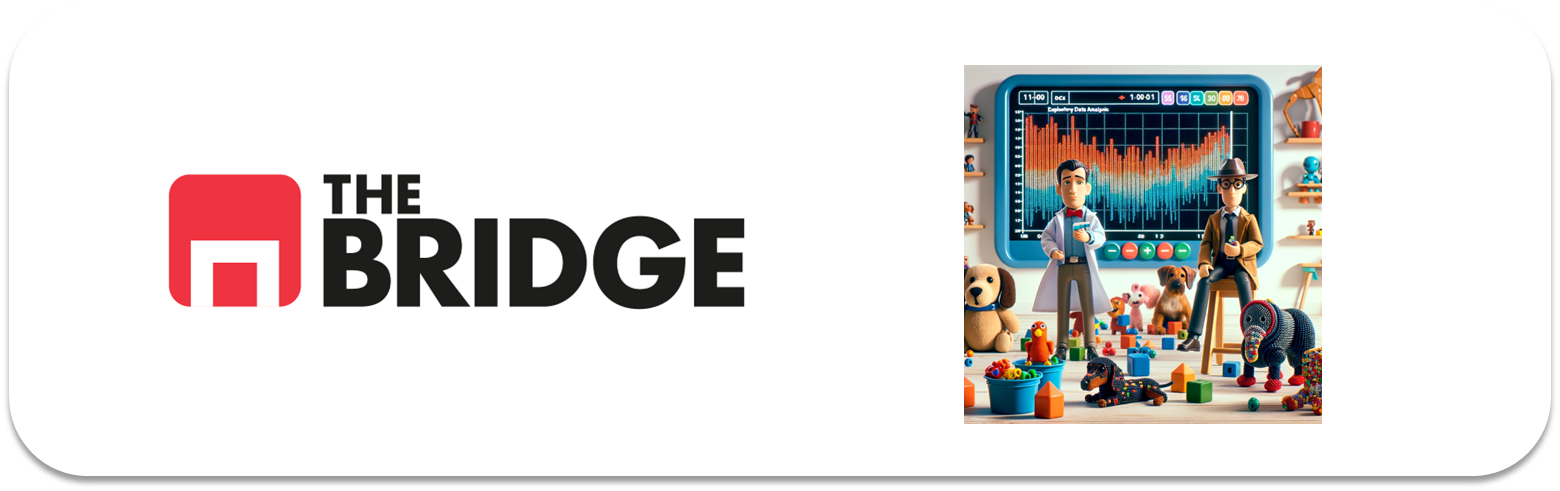

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [31]:

import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu 
from bootcampviztools import *

## #1 TITANIC

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv('./data/titanic.csv')
#df_titanic.info()

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns= ['deck', 'survived', 'pclass', 'embarked'], inplace= True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic.drop(columns= ['parch', 'sibsp'], inplace= True)
df_titanic.sample(3)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
504,female,16.0,86.50,First,woman,False,Southampton,yes,True,0
799,female,30.0,24.15,Third,woman,False,Southampton,no,False,2
441,male,20.0,9.50,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace= True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_17500\2227395876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace= True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
df_titanic['age'].fillna(df_titanic.groupby(['who'])['age'].transform('mean').round(0), inplace= True)
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_17500\61642074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic.groupby(['who'])['age'].transform('mean').round(0), inplace= True)


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

## Pregunta 1

In [7]:
df_titanic['supervivencia'] = df_titanic['alive'].map(lambda x:True if x == 'yes' else False ) # mapeo utilizando una funcion lambda para sacar una columna binaria y poder jugar en terminos absolutos
print(df_titanic.groupby(['who'])['supervivencia'].sum()) # sobrevivieron mas mujeres
print()
print(df_titanic.groupby(['who'])['supervivencia'].sum()/df_titanic.groupby(['who'])['supervivencia'].count())  # porcentualmente sobrevivieron mas mujeres tambien

who
child     49
man       88
woman    205
Name: supervivencia, dtype: int64

who
child    0.590361
man      0.163873
woman    0.756458
Name: supervivencia, dtype: float64


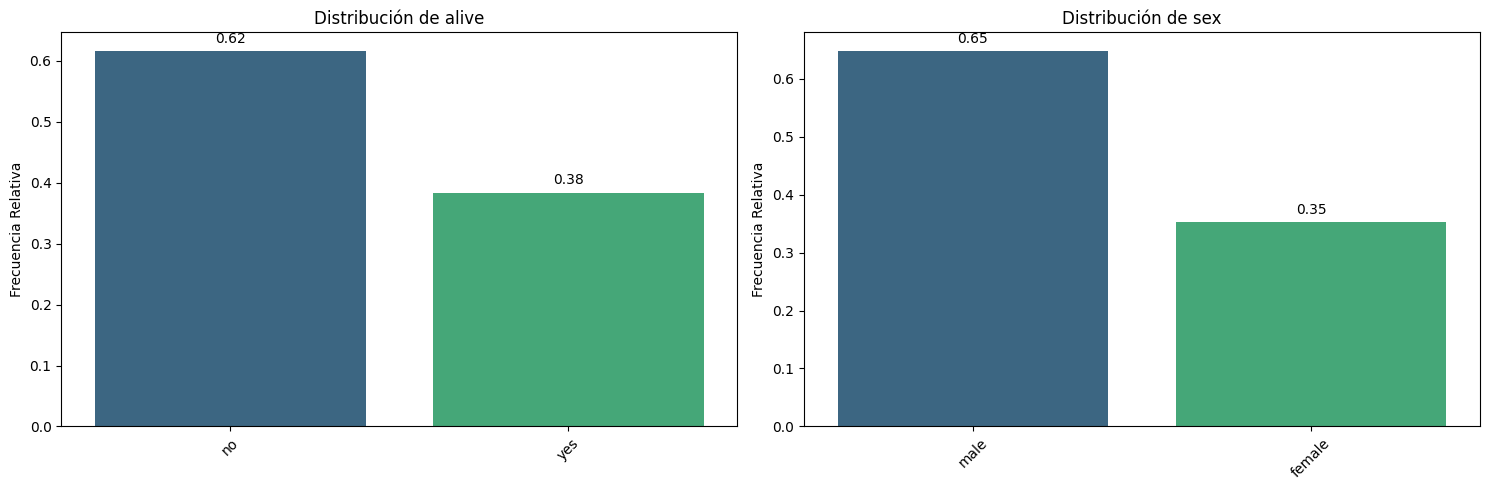

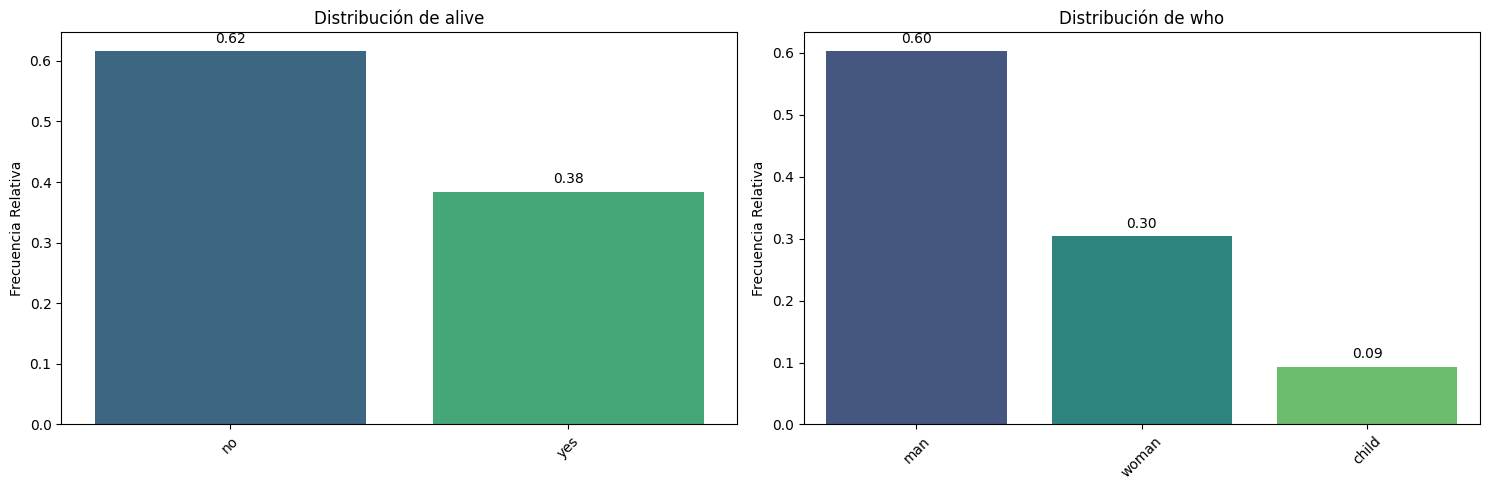

In [8]:
pinta_distribucion_categoricas(df_titanic,["alive","sex"], relativa= True, mostrar_valores= True)
pinta_distribucion_categoricas(df_titanic,["alive","who"], relativa= True, mostrar_valores= True)

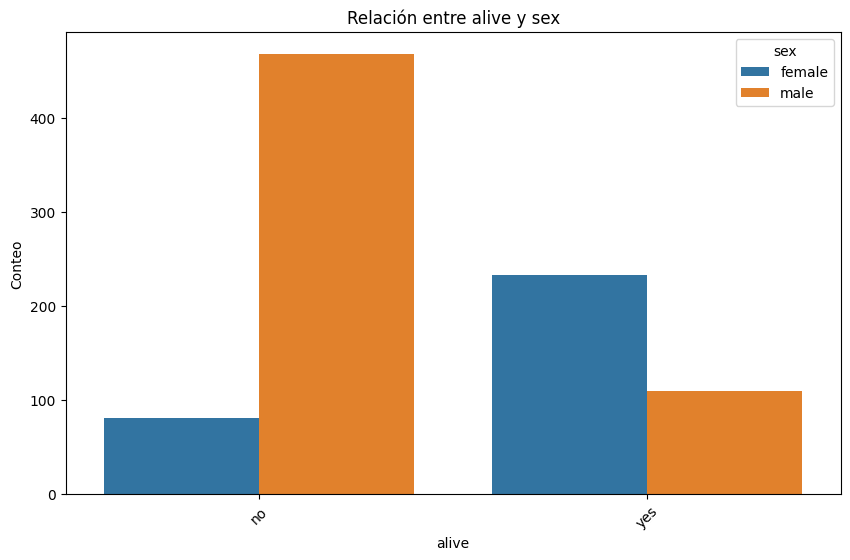

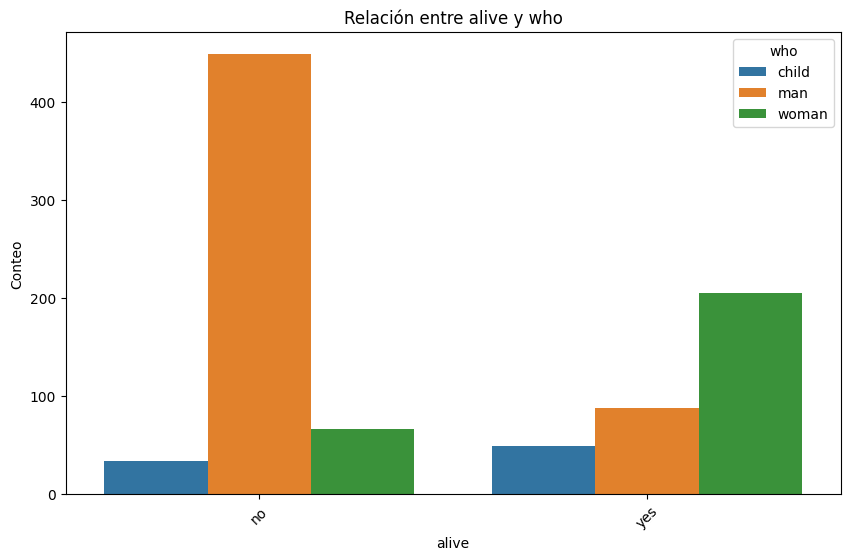

In [9]:
plot_categorical_relationship_fin(df_titanic, 'alive', 'sex')
plot_categorical_relationship_fin(df_titanic, 'alive', 'who')

si veo una relacion clara entre sexo y supervivencia
no veo una relacion tan clara entre ser niño o adulto de cara a la supervivencia

## Pregunta 2

In [10]:
print(df_titanic.groupby(['class'])['supervivencia'].sum()) # sobrevivieron mas personas de primera clase
print()
print(df_titanic.groupby(['class'])['supervivencia'].sum()/df_titanic.groupby(['class'])['supervivencia'].count())  # porcentualmente sobrevivieron mas de primera clase tambien, aunque hay menos diferencia dentre segunda y tercera

class
First     136
Second     87
Third     119
Name: supervivencia, dtype: int64

class
First     0.629630
Second    0.472826
Third     0.242363
Name: supervivencia, dtype: float64


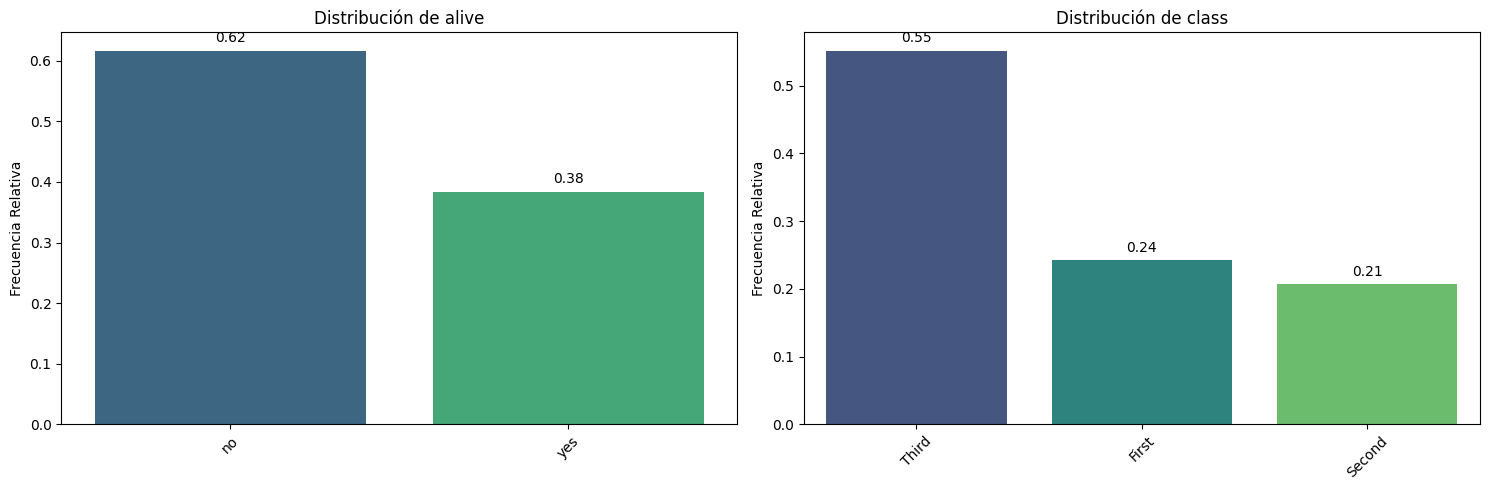

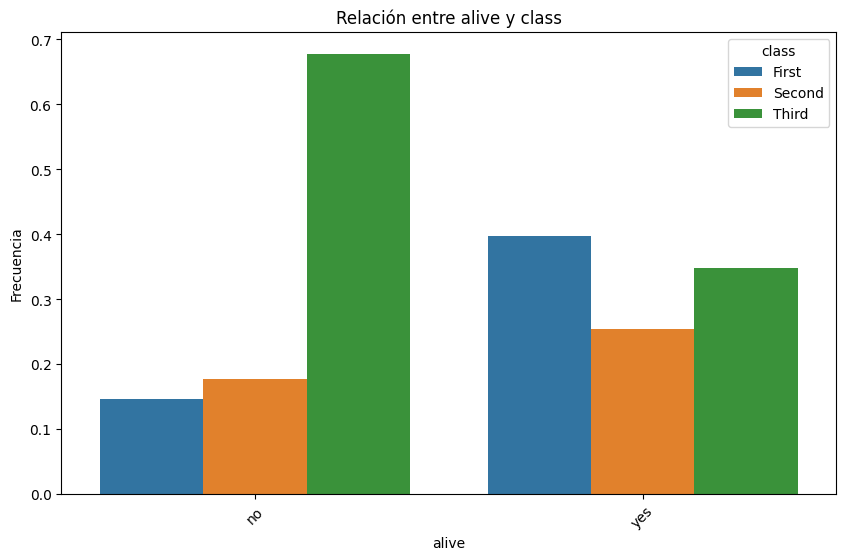

In [11]:
pinta_distribucion_categoricas(df_titanic,["alive","class"], relativa= True, mostrar_valores= True)
plot_categorical_relationship_fin(df_titanic, 'alive', 'class', relative_freq= True)

a raiz de los porcentajes y lo visualmente palpable en la grafica si establezco una relacion. Tercera clase tiene una probabilidad de no supervivencia enorme

## Pregunta 3

In [12]:
print(df_titanic.groupby(['embark_town'])['supervivencia'].sum()) # sobrevivieron mas personas de Southampton
print()
print(df_titanic.groupby(['embark_town'])['supervivencia'].sum()/df_titanic.groupby(['embark_town'])['supervivencia'].count())  # porcentualmente sobrevivieron mas personas de Cherbourg

embark_town
Cherbourg       93
Queenstown      30
Southampton    219
Name: supervivencia, dtype: int64

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.339009
Name: supervivencia, dtype: float64


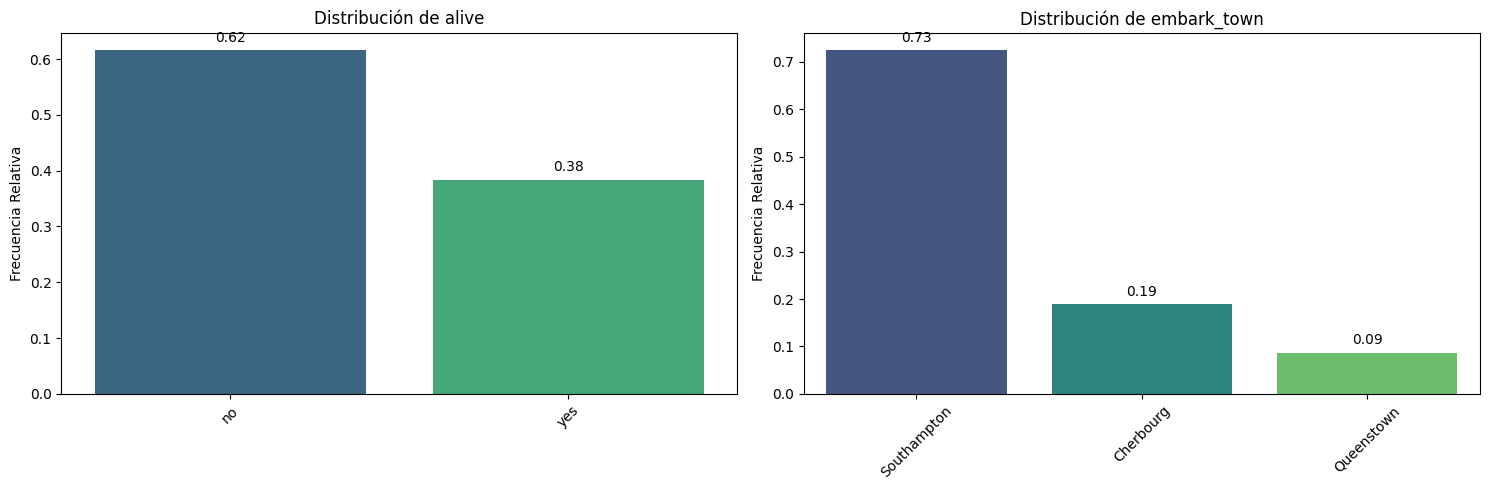

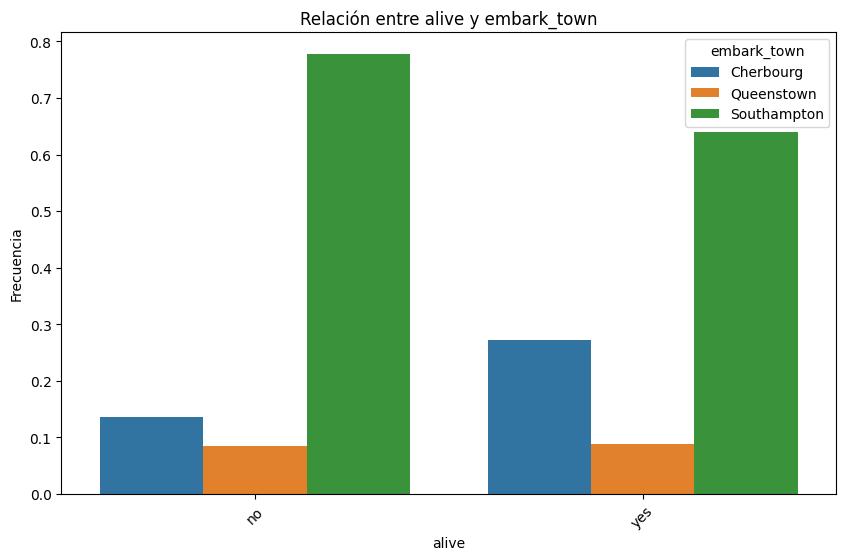

In [13]:
pinta_distribucion_categoricas(df_titanic,["alive","embark_town"], relativa= True, mostrar_valores= True)
plot_categorical_relationship_fin(df_titanic, 'alive', 'embark_town', relative_freq= True)

porcentualmente tienes mas probabilidad de sobrevivir si embarcaste en Cherbourg

## Pregunta 4

(2,)


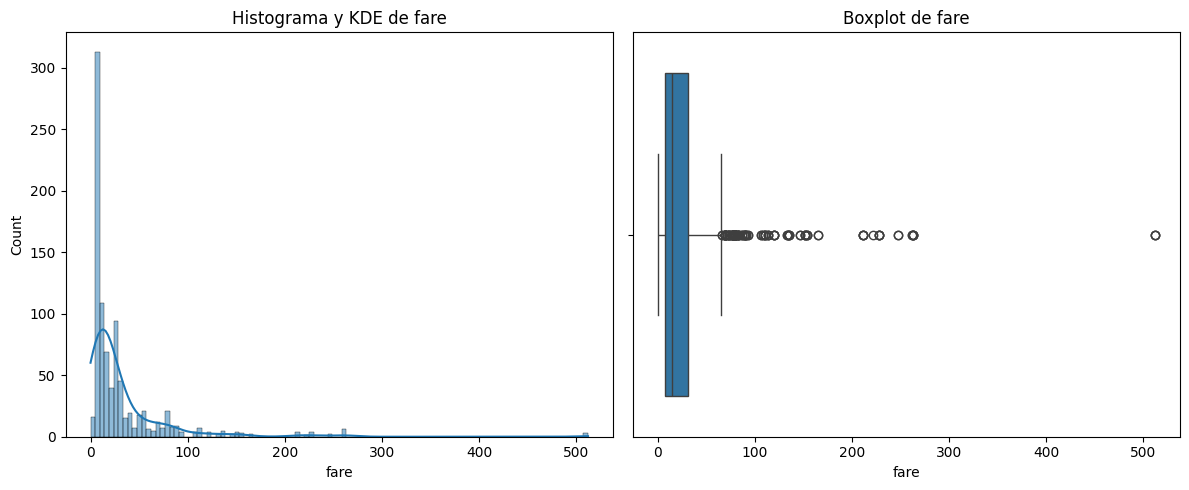

In [15]:
plot_combined_graphs(df_titanic,["fare"])

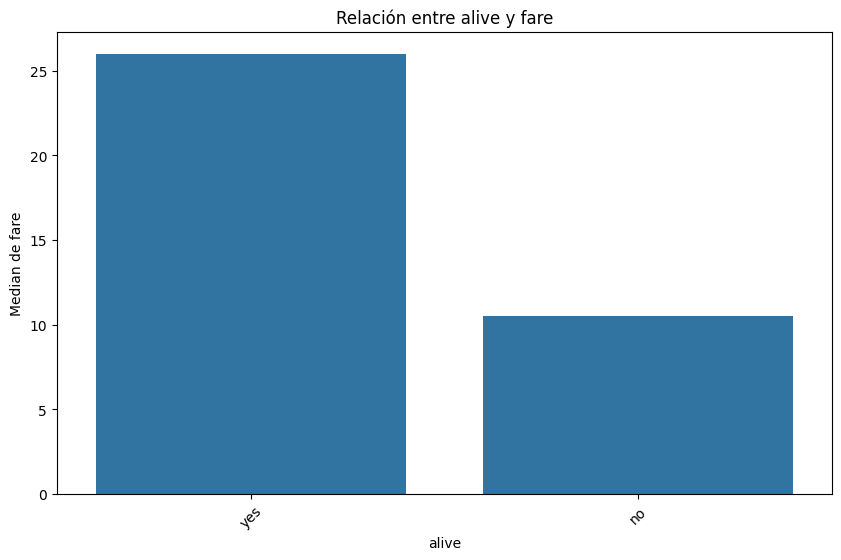

,50%,mean
age,32.0000,30.295365
fare,14.4542,32.204208
family_members,0.0000,0.904602


In [22]:
plot_categorical_numerical_relationship(df_titanic,"alive","fare", measure = "median") 
df_titanic.describe().loc[['50%', 'mean']].T # no considero la media representativa

# hay muchos outliers y no confio completamente en estos valores

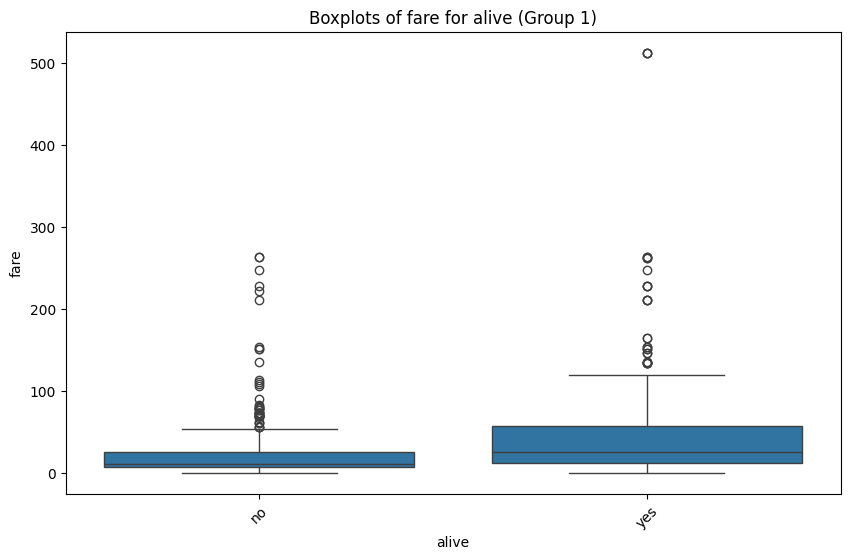

In [23]:
plot_grouped_boxplots(df_titanic,"alive","fare")

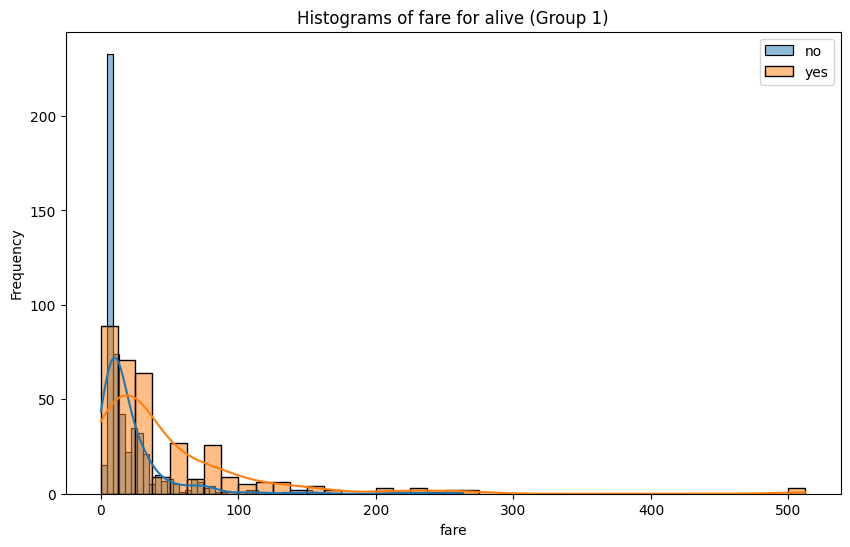

In [28]:
plot_grouped_histograms(df_titanic,"alive", "fare",5) # tienen tendencias similares

In [32]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


no me gustan un pelo estas graficas, no aprecio dependencia en los histogramas agrupados, pero los test indican que estan relacionadas
entinedo que estan relacionadas 
aqui habria que profundizar mas si hay tiempo


## Pregunta 5

In [29]:
df_titanic[df_titanic['fare'] == 0]
# todos eran hombres adultos que viajaban solos, ademas embarcaron todos en el primer puerto. debian ser parte de la tripulacion

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,supervivencia
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0,False
263,male,40.0,0.0,First,man,True,Southampton,no,True,0,False
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0,True
277,male,33.0,0.0,Second,man,True,Southampton,no,True,0,False
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0,False
413,male,33.0,0.0,Second,man,True,Southampton,no,True,0,False
466,male,33.0,0.0,Second,man,True,Southampton,no,True,0,False
481,male,33.0,0.0,Second,man,True,Southampton,no,True,0,False
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0,False
633,male,33.0,0.0,First,man,True,Southampton,no,True,0,False


In [30]:
df_titanic.loc[df_titanic['fare'] == df_titanic['fare'].max()]
# eran 3 personas con la tarifa mas cara y sobrevivieron todos

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,supervivencia
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,True
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,True
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,True


## Pregunta 6

Respuesta Southampton:


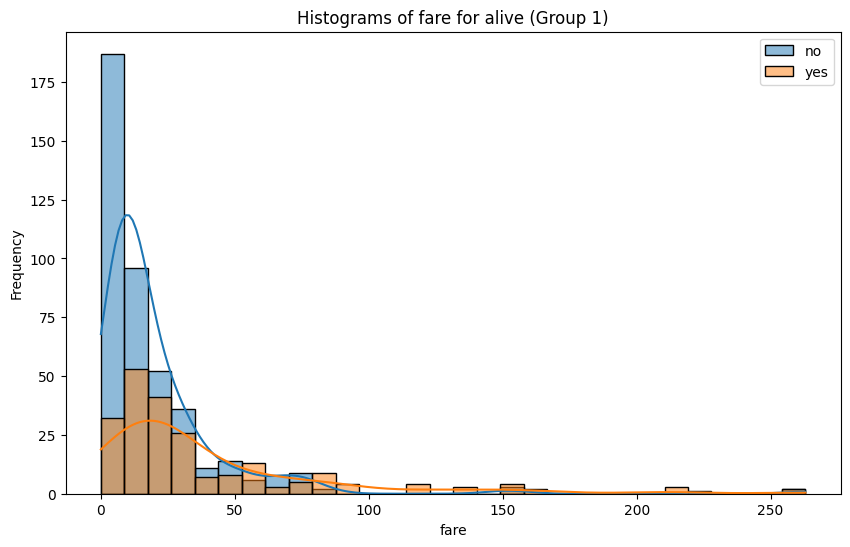

Respuesta Cherbourg:


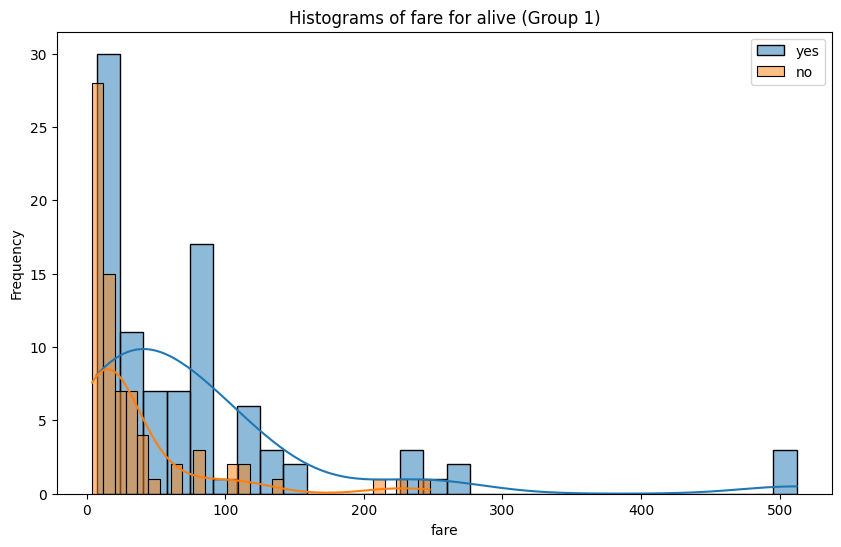

Respuesta Queenstown:


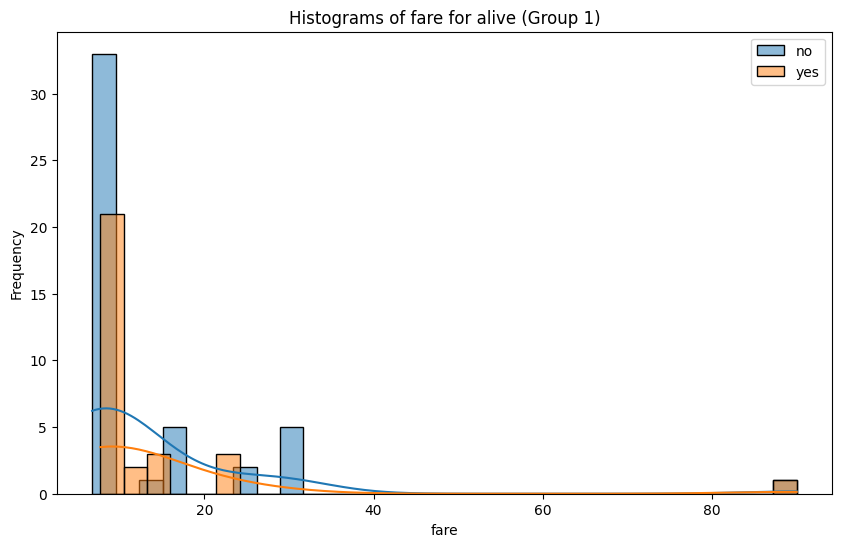

In [55]:
columnas = ["embark_town","alive","fare"] 
col_directora = "embark_town"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2,group_size=3, bins = 30 )

(2,)


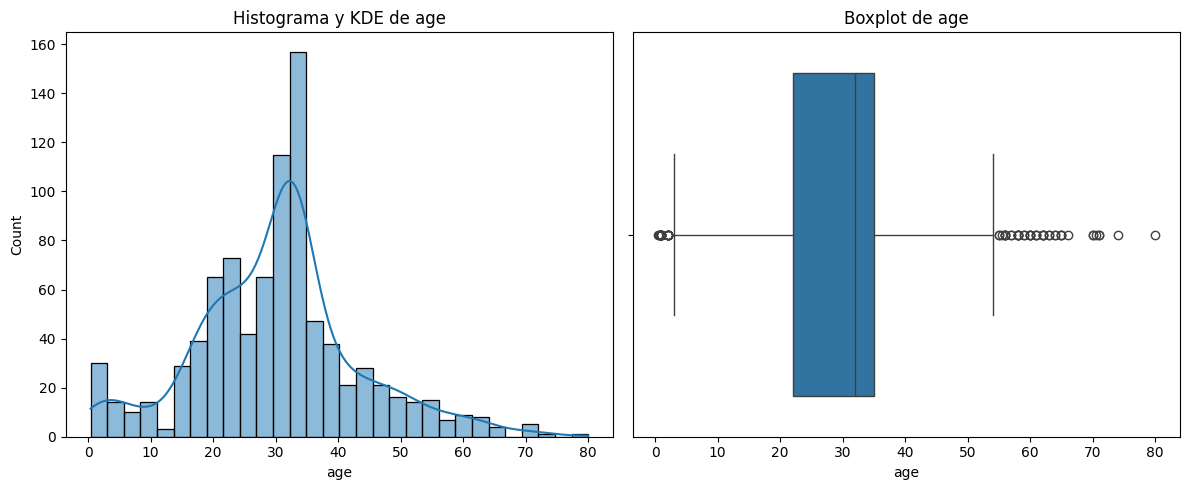

In [56]:
plot_combined_graphs(df_titanic,["age"])

## Preguntas 7 



Respuesta Third:


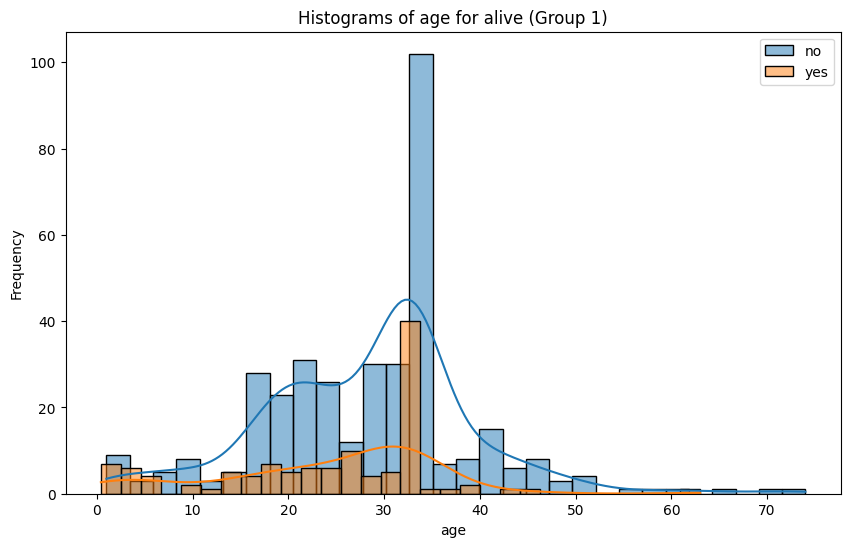

Respuesta First:


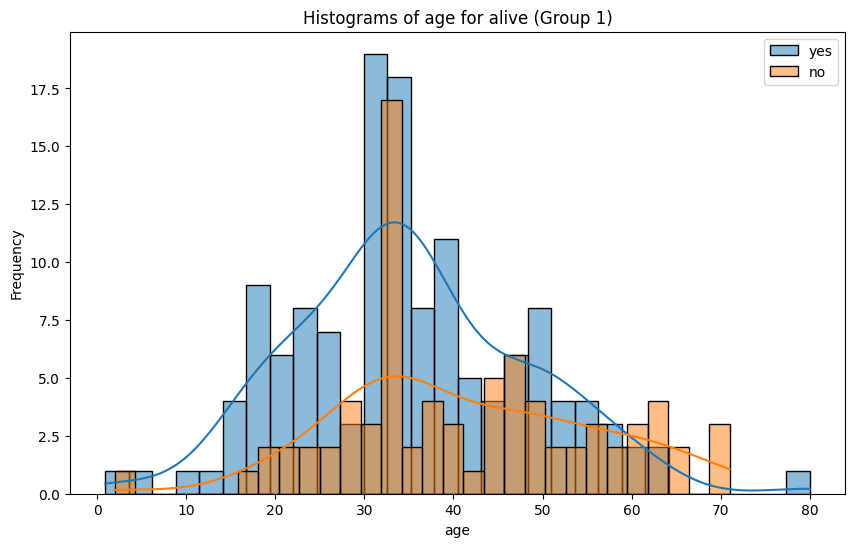

Respuesta Second:


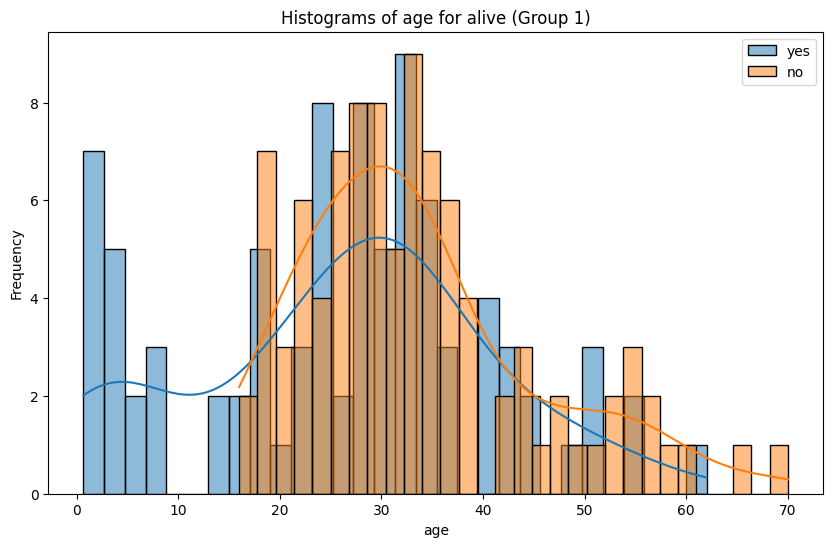

In [57]:
columnas = ["class","alive","age"] 
col_directora = "class"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2,group_size=3, bins = 30 )

Respuesta no:


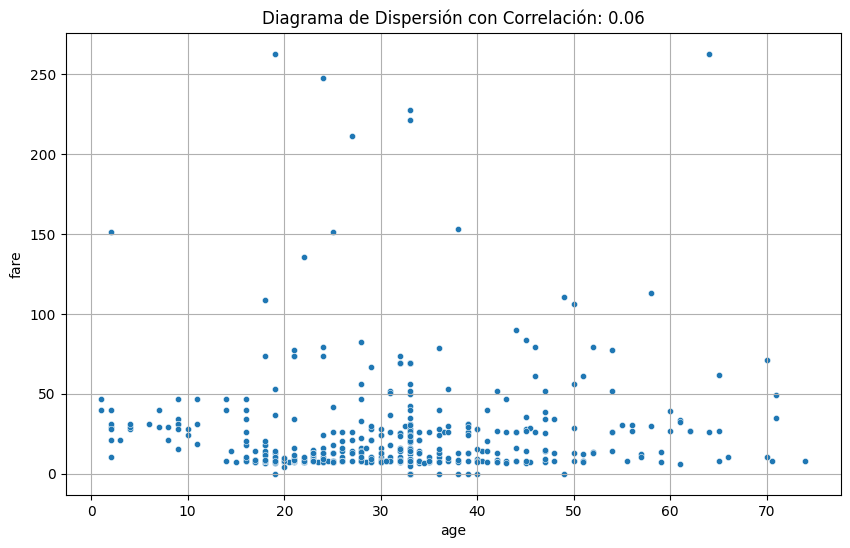

Respuesta yes:


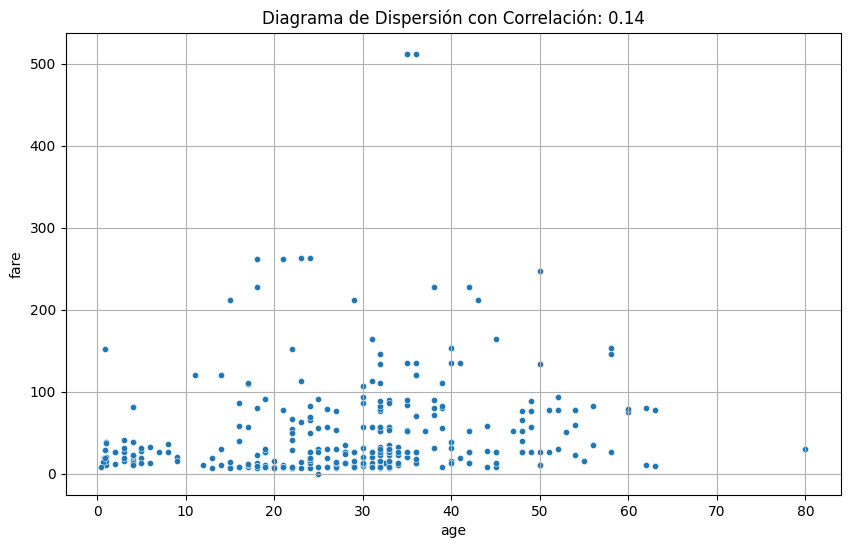

In [58]:
columnas = ["fare","alive","age"] 
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

encuentro mayor cantidad de vuelos pero menores ingresos medianos

In [44]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

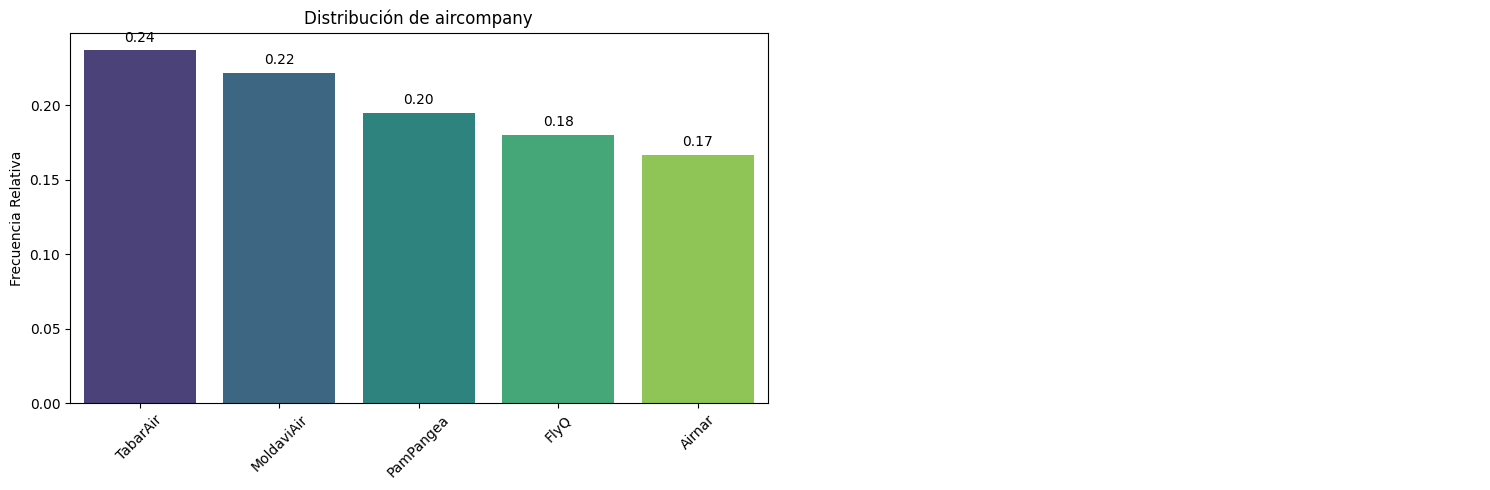

In [45]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True, mostrar_valores= True)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


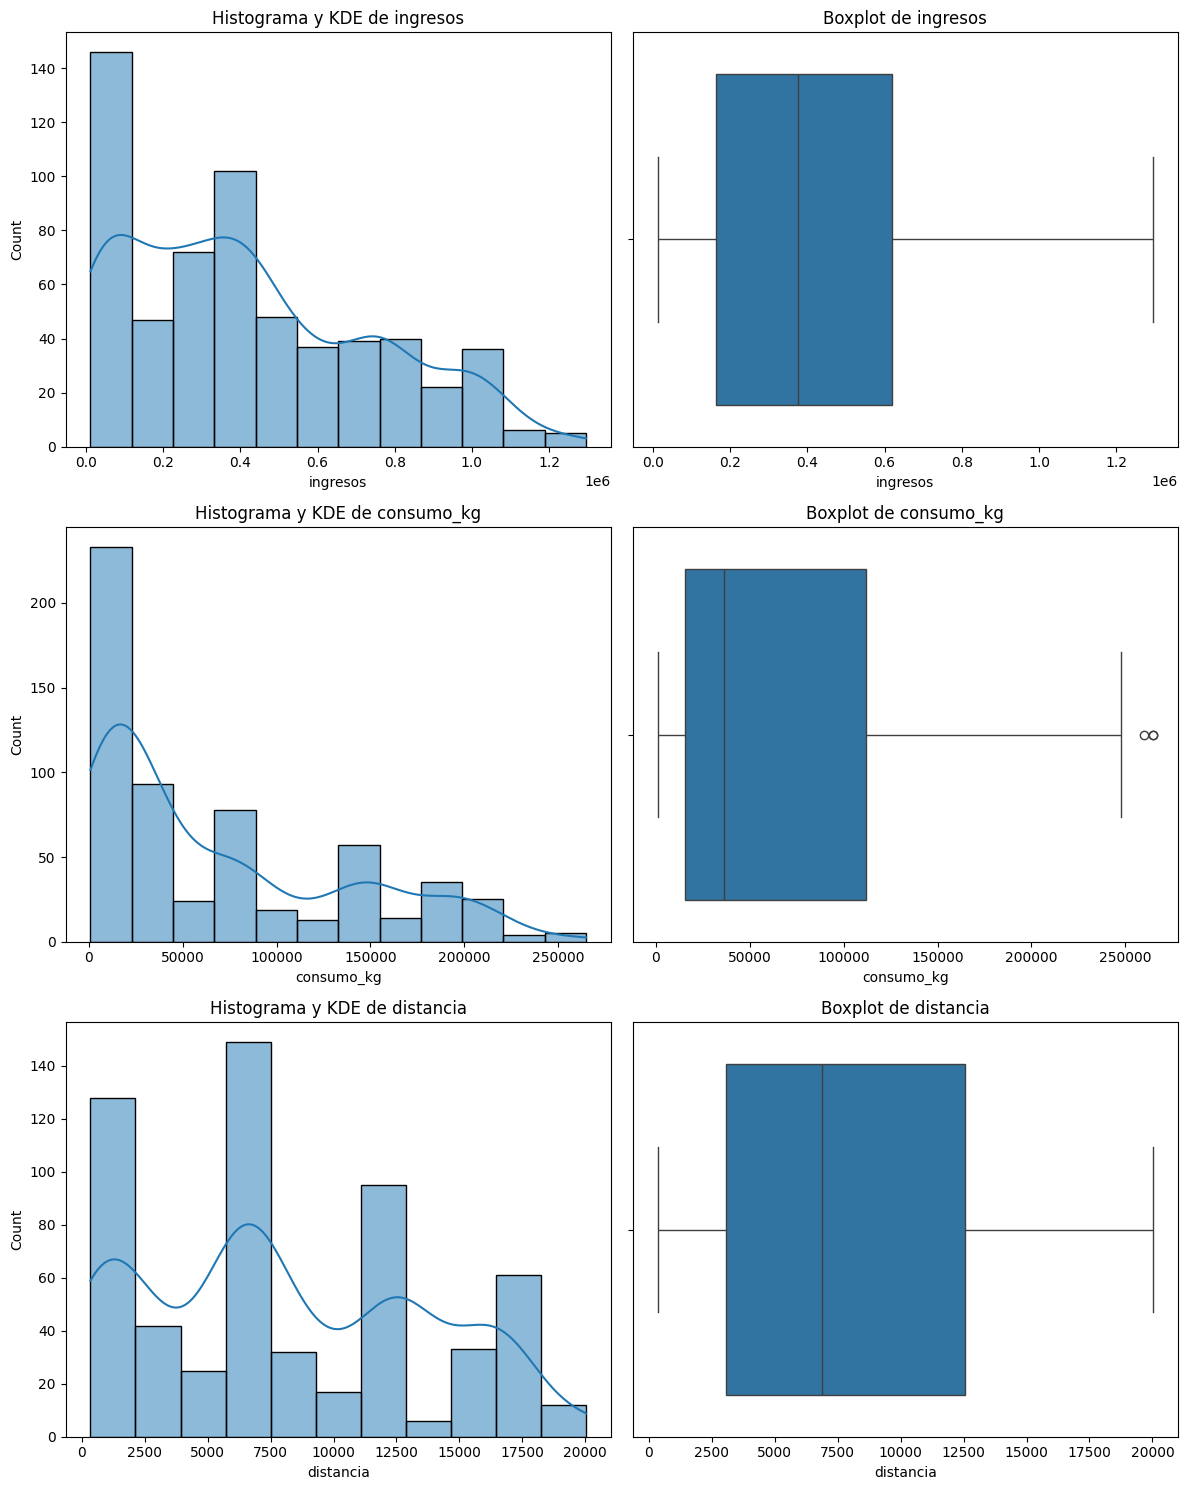

In [46]:
plot_combined_graphs(df_viajes,["ingresos","consumo_kg","distancia"])

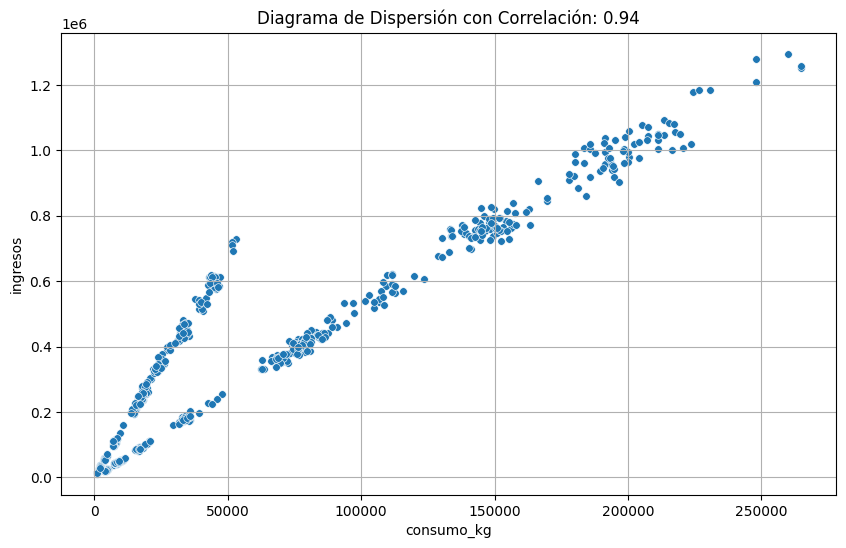

In [47]:
# CONSUMO VS INGRESOS

grafico_dispersion_con_correlacion(df_viajes,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

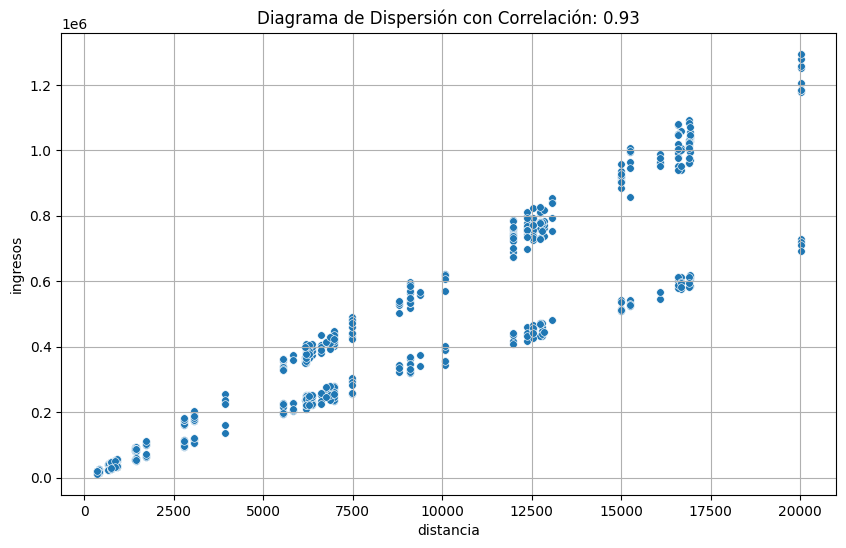

In [48]:
# DISTANCIA VS INGRESOS

grafico_dispersion_con_correlacion(df_viajes,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

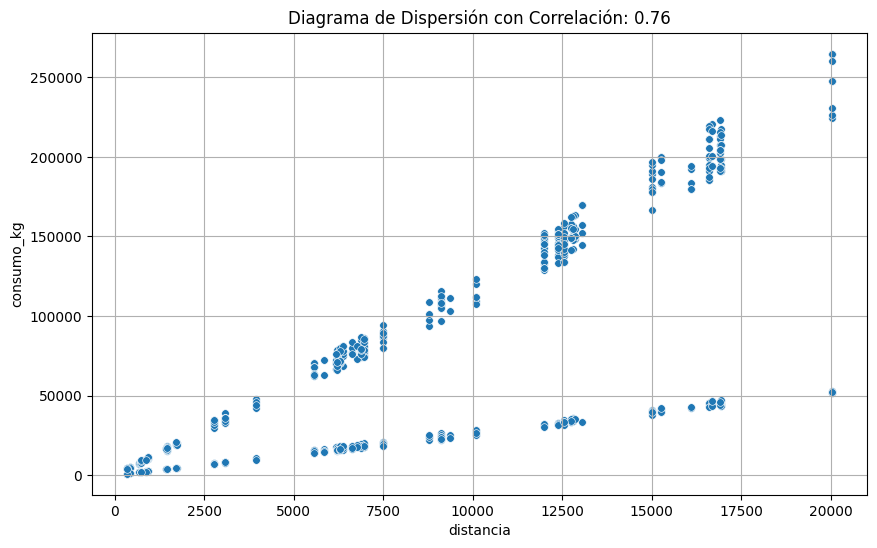

In [49]:
# DISTANCIA VS CONSUMO

grafico_dispersion_con_correlacion(df_viajes,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

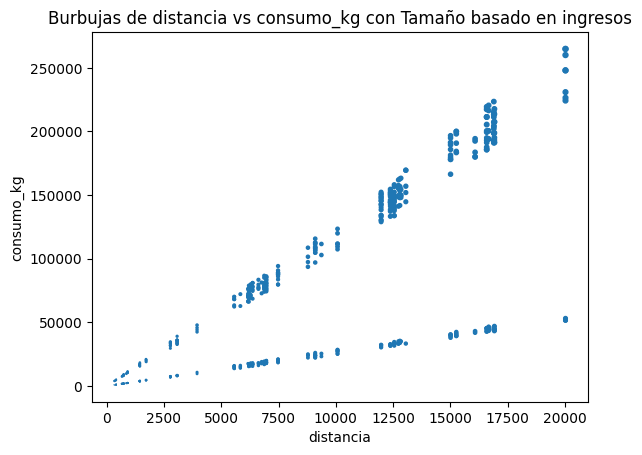

In [50]:
# TODO A LA VEZ

bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


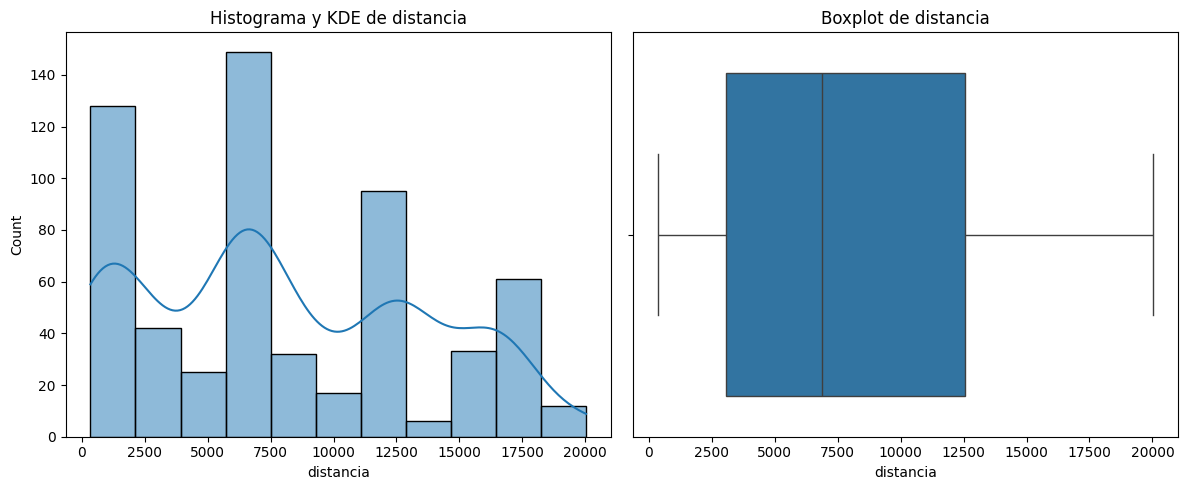

In [51]:
plot_combined_graphs(df_viajes,["distancia"])

In [52]:
df_viajes["distancia"].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [53]:
df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins=[0, 3000, 6500, 12500, df_viajes["distancia"].max() ], labels=["cat1", "cat2", "cat3", "cat4"])

df_viajes["cat_vuelo"].value_counts()

cat_vuelo
cat3    174
cat4    163
cat1    146
cat2    117
Name: count, dtype: int64

Respuesta cat1:


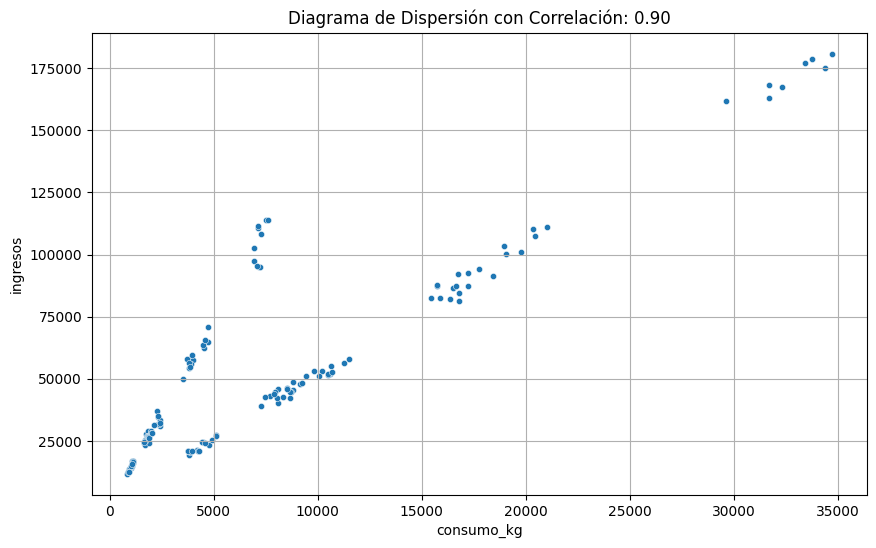

Respuesta cat4:


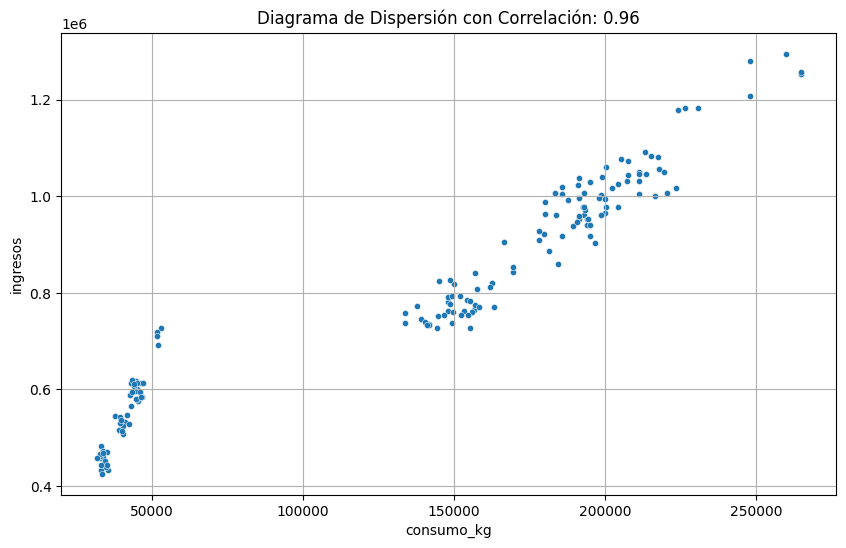

Respuesta cat3:


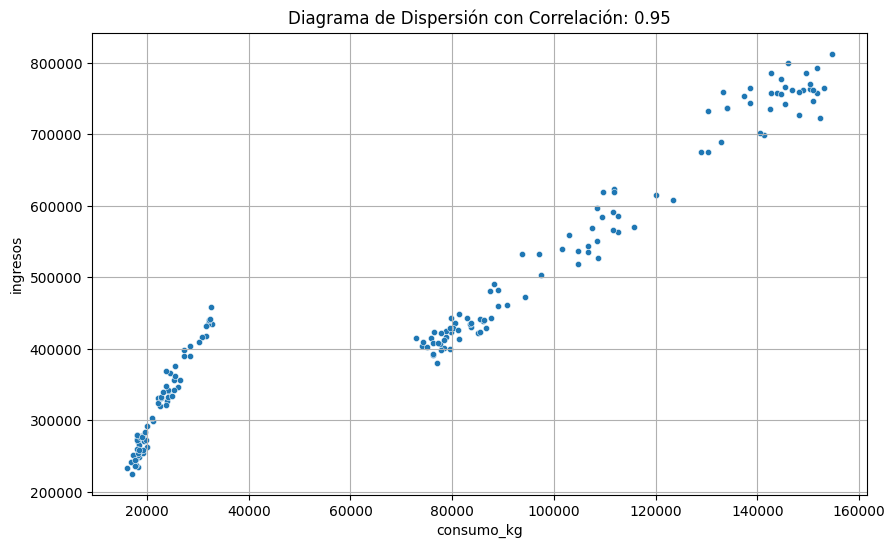

Respuesta cat2:


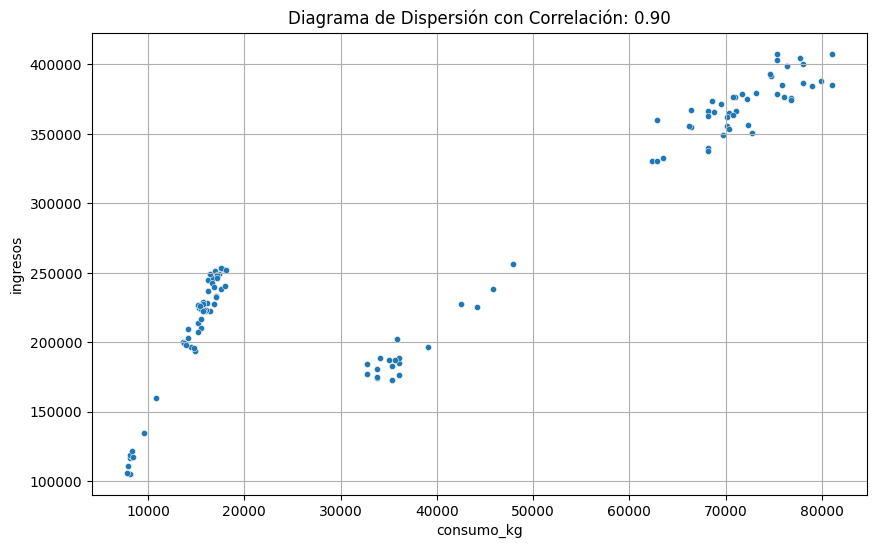

In [54]:
columnas = ["cat_vuelo", "ingresos", "consumo_kg"]
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_viajes[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes.loc[df_viajes[col_directora] == valor,[col_2,col_1]] 
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.